In [ ]:
import string

# Dicionário de continentes e países
continentes_pacotes = {
    'África': ['Egito', 'África do Sul', 'Marrocos', 'Quênia', 'Nigéria', 'Argélia', 'Tunísia', 'Gana', 'Angola', 'Senegal', 'Camarões', 'Costa do Marfim', 'Moçambique', 'Sudão', 'Etiópia'],
    'Europa': ['França', 'Sérvia', 'Alemanha', 'Itália', 'Espanha', 'Reino Unido', 'Portugal', 'Países Baixos', 'Bélgica', 'Suécia', 'Noruega', 'Dinamarca', 'Finlândia', 'Polônia', 'Rússia', 'Suíça', 'Áustria', 'Grécia', 'Turquia', 'Irlanda', 'República Tcheca', 'Hungria', 'Croácia', 'Romênia'],
    'América Latina': ['Argentina', 'Chile', 'Colômbia', 'Peru', 'Venezuela', 'Equador', 'Bolívia', 'Paraguai', 'Uruguai', 'Suriname', 'Guiana', 'Guiana Francesa', 'Cuba', 'República Dominicana', 'Jamaica', 'Bahamas', 'Haiti', 'Belize', 'Costa Rica'],
    'América do Norte': ['EUA', 'México', 'Canadá'],
    'Mundo': ['China', 'Japão', 'Índia', 'Tailândia', 'Coreia do Sul', 'Coreia do Norte', 'Indonésia', 'Malásia', 'Filipinas', 'Paquistão', 'Bangladesh', 'Vietnã', 'Nepal', 'Sri Lanka', 'Cingapura', 'Emirados Árabes Unidos', 'Qatar', 'Arábia Saudita', 'Israel', 'Irã', 'Austrália', 'Nova Zelândia', 'Papua-Nova Guiné', 'Fiji', 'Samoa', 'Tonga', 'Ilhas Salomão', 'Vanuatu'],
    'Brasil': ["Acre", "Amapá", "Amazonas", "Pará", "Rondônia", "Roraima", "Tocantins", "Alagoas", "Bahia", "Ceará", "Maranhão", "Paraíba", "Pernambuco", "Piauí", "Rio Grande do Norte"]

}

# Função para remover acentos (sem usar o unidecode)
def remover_acentos(texto):
    acentos = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ã': 'a', 'õ': 'o', 'â': 'a', 'ê': 'e', 'ô': 'o', 'à': 'a', 'è': 'e', 'ù': 'u', 'ç': 'c'}
    for acento, sem_acento in acentos.items():
        texto = texto.replace(acento, sem_acento)
    return texto

# Função para normalizar a string (ignorando maiúsculas, minúsculas, pontuação e acentos)
def normalizar_string(texto):
    texto_normalizado = texto.lower()  # Converte para minúsculas
    texto_normalizado = texto_normalizado.translate(str.maketrans('', '', string.punctuation))  # Remove pontuação
    texto_normalizado = remover_acentos(texto_normalizado)  # Remove acentos manualmente
    return texto_normalizado

# Função para determinar o continente e o pacote de viagem com base no país digitado
def obter_pacote_viagem(pais):
    pais_normalizado = normalizar_string(pais)  # Normaliza o nome do país do usuário
    for continente, paises in continentes_pacotes.items():
        # Normaliza os países do banco de dados também
        paises_normalizados = [normalizar_string(p) for p in paises]
        if pais_normalizado in paises_normalizados:
            return continente  # Retorna o continente, não o pacote completo
    return "País não encontrado no banco de dados."

# Dicionário de valores por dia de viagem, para cada continente
valor_por_diaria = {
    'África': 25,
    'Europa': 30,
    'América Latina': 20,
    'América do Norte': 25,
    'Mundo': 35,
    'Brasil': 12
}

# Função para calcular o valor da viagem baseado no continente e dias
def calcular_valor_viagem(dias, continente):
    if continente in valor_por_diaria:
        valor_por_dia = valor_por_diaria[continente]
        return dias * valor_por_dia
    else:
        return 0  # Se o continente não for encontrado no dicionário de valores

# Solicitar ao usuário que digite um país
pais = input("Digite um destino: ")

# Obter o continente do país
continente = obter_pacote_viagem(pais)

# Verificar se o país foi encontrado
if continente == "País não encontrado no banco de dados.":
    print(continente)
else:
    # Exibir o nome do pacote
    print(f"Pacote selecionado: {continente}")
    # Solicitar ao usuário a quantidade de dias da viagem (limitado a 365 dias)
    dias = int(input(f"Digite a quantidade de dias para sua viagem ao {pais} (máximo 365 dias): "))

    # Verificar se o número de dias está dentro do limite
    if dias > 365:
        print("O número de dias não pode ser superior a 365. Tente novamente.")
    else:
        # Calcular o valor total da viagem
        valor_viagem = calcular_valor_viagem(dias, continente)
        print(f"O valor total do pacote para {dias} dias na {continente} é: R$ {valor_viagem:.2f}")



Digite um destino: Roraima
Pacote selecionado: Brasil
Digite a quantidade de dias para sua viagem ao Roraima (máximo 365 dias): 25
O valor total do pacote para 25 dias na Brasil é: R$ 300.00


# Inserir quantidade de pessoas

Este código fará com que o usuário possa informar a quantidade de pessoas e o código irá recalcular o valor do pacote.

In [ ]:
while True:
    try:
        pessoas = int(input("Digite a quantidade de pessoas que irão viajar (máximo 7): "))
        if 1 <= pessoas <= 7:
            break  # Entrada válida, sai do loop
        else:
            print("O número de pessoas deve ser entre 1 e 7. Tente novamente.")
    except ValueError:
        print("Por favor, insira um número válido para a quantidade de pessoas.")

valor_viagem = calcular_valor_viagem(dias, continente) * pessoas
print(f"O valor total do pacote para {dias} dias, para {pessoas} pessoa(s), na {continente} é: R$ {valor_viagem:.2f}")


Digite a quantidade de pessoas que irão viajar (máximo 7): 2
O valor total do pacote para 25 dias, para 2 pessoa(s), na Brasil é: R$ 600.00


# Dado complementar

In [ ]:
deficiencia = input("Você é ou seu acompanhante é uma pessoa com deficiência(sim/não): ").strip().lower() # strip para remover espaçamentos e lower para converter em minusculas
print(deficiencia)

while deficiencia not in ["sim", "nao", "não"]: # validação da resposta
    deficiencia = input("Resposta inválida. Digite 'sim' ou 'não': ").strip().lower()
# ajuste do pacote baseado na declaração de deficiência, podendo ser armazenada para análise.
if deficiencia == "sim":
    desconto = 0.10  # 10% de desconto
    print("Será aplicado um desconto de 10% no valor total.")
else:
    desconto = 0.00  # Sem desconto

# Recálculo de valor
valor_total = valor_viagem * (1 - desconto)
print(f"O valor total do pacote, com os ajustes, é: R$ {valor_total:.2f}")

Você é ou seu acompanhante é uma pessoa com deficiência(sim/não): sim
sim
Será aplicado um desconto de 10% no valor total.
O valor total do pacote, com os ajustes, é: R$ 540.00


In [ ]:
motivos_validos = ['lazer', 'trabalho', "estudo", 'visita familiar']

while True:
  Tipo_Viagem = input("Qual o motivo da sua viagem(lazer/trabalho/estudo/Visita Familiar): ").strip().lower()
  if Tipo_Viagem in motivos_validos:
    break
  else:
    print("Motivo inválido. Tente novamente.")
print(Tipo_Viagem)

Qual o motivo da sua viagem(lazer/trabalho/estudo/Visita Familiar): lazer
lazer


# Salvando dados

Dados serão salvos em planilha Excel. Para isso, precisaremos importar uma biblioteca chamada openpyxl.



In [ ]:
%pip install openpyxl


In [ ]:
from datetime import date
import openpyxl  # Biblioteca para manipulação de Excel

def salvar_dados_excel(dados):
    """
    Salva os dados em um arquivo Excel.
    Se o arquivo não existir, ele será criado. Caso exista, os dados serão adicionados.
    """
    arquivo_excel = "dados_viagem.xlsx"  # Nome do arquivo Excel

    try:
        # Tenta abrir o arquivo existente
        workbook = openpyxl.load_workbook(arquivo_excel)
        sheet = workbook.active
    except FileNotFoundError:
        # Caso o arquivo não exista, cria um novo
        workbook = openpyxl.Workbook()
        sheet = workbook.active
        # Cria o cabeçalho na planilha
        sheet.append(["Data", "País", "Continente/Pacote", "Dias", "Pessoas", "Motivo", "Deficiência", "Valor Total"])

    # Adiciona os dados na planilha
    sheet.append(dados)

    # Salva o arquivo Excel
    workbook.save(arquivo_excel)
    workbook.close()

# Aqui deve ser o seu código principal com o cálculo da viagem
pais = input("Digite um país: ")

# Vamos supor que você tenha a função que retorna o continente/pacote
continente = obter_pacote_viagem(pais)
continentes_pacote = continente  # Definindo a variável 'continentes_pacote'

# Outras variáveis do código
dias = int(input("Digite a quantidade de dias para sua viagem: "))
pessoas = int(input("Digite a quantidade de pessoas para sua viagem: "))
motivo = input("Qual o motivo da sua viagem: ")
deficiencia = input("Você é uma pessoa com deficiência? (sim/não): ")

# Calculando o valor total (ajuste conforme a lógica do seu código)
valor_total = calcular_valor_viagem(dias, continente) * pessoas

# Apresentando o resultado para o usuário
print("\nResumo da sua viagem:")
print(f"País: {pais}")
print(f"Continente/Pacote: {continentes_pacote}")
print(f"Duração da viagem: {dias} dias")
print(f"Número de pessoas: {pessoas}")
print(f"Motivo da viagem: {motivo.capitalize()}")
print(f"Deficiência: {deficiencia.capitalize()}")
print(f"Valor Total: R$ {valor_total:.2f}")

# Obtemos a data atual
data_atual = date.today()

# Salvando os dados no Excel
salvar_dados_excel([data_atual, pais, continentes_pacote, dias, pessoas, motivo, deficiencia, valor_total])
print("Os dados foram salvos com sucesso no arquivo 'dados_viagem.xlsx'")

Digite um país: Fiji
Digite a quantidade de dias para sua viagem: 10
Digite a quantidade de pessoas para sua viagem: 3
Qual o motivo da sua viagem: trabalho
Você é uma pessoa com deficiência? (sim/não): não

Resumo da sua viagem:
País: Fiji
Continente/Pacote: Mundo
Duração da viagem: 10 dias
Número de pessoas: 3
Motivo da viagem: Trabalho
Deficiência: Não
Valor Total: R$ 1050.00
Os dados foram salvos com sucesso no arquivo 'dados_viagem.xlsx'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Análises dos dados coletados

Após a estruturação do código, será importada uma base de dados, onde poderemos analisar as informações e usar estas informações para tomada de decisões, análise dos nossos clientes, das nossas vendas, etc;

In [2]:
import pandas as pd
import numpy as np


In [3]:
# importação do dataset
viagem = pd.read_excel('/content/simulacoes_viagem.xlsx')
viagem.head()

,Data de Simulação,País Escolhido,Pacote,Quantidade de Dias,Quantidade de Pessoas,Pessoas com Deficiência,Motivo da Viagem,Valor Total do Pacote (R$)
0,2024-01-01,França,Europa,7,2,Não,Negócios,420.0
1,2024-01-02,Japão,Mundo,10,4,Sim,Estudos,1260.0
2,2024-01-03,EUA,América do Norte,14,6,Não,Visita a familiares,2100.0
3,2024-01-04,Egito,África,21,7,Sim,Cultural,3307.5
4,2024-01-05,Brasil,Brasil,3,1,Não,Lazer,36.0


In [4]:
# verificar nulos
viagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Data de Simulação           305 non-null    datetime64[ns]
 1   País Escolhido              305 non-null    object        
 2   Pacote                      305 non-null    object        
 3   Quantidade de Dias          305 non-null    int64         
 4   Quantidade de Pessoas       305 non-null    int64         
 5   Pessoas com Deficiência     305 non-null    object        
 6   Motivo da Viagem            305 non-null    object        
 7   Valor Total do Pacote (R$)  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 19.2+ KB


In [5]:
# verificar parâmetros
viagem.describe()

,Data de Simulação,Quantidade de Dias,Quantidade de Pessoas,Valor Total do Pacote (R$)
count,305,305.000000,305.000000,305.000000
mean,2024-06-01 00:00:00,10.947541,3.970492,1434.277377
min,2024-01-01 00:00:00,3.000000,1.000000,32.400000
25%,2024-03-17 00:00:00,7.000000,2.000000,378.000000
50%,2024-06-01 00:00:00,10.000000,4.000000,1260.000000
75%,2024-08-16 00:00:00,14.000000,6.000000,2100.000000
max,2024-10-31 00:00:00,21.000000,7.000000,3675.000000
std,NaN,6.132088,2.275972,1233.471572


In [ ]:
viagem.columns

Index(['Data de Simulação', 'País Escolhido', 'Pacote', 'Quantidade de Dias',
       'Quantidade de Pessoas', 'Pessoas com Deficiência', 'Motivo da Viagem',
       'Valor Total do Pacote (R$)'],
      dtype='object')

In [6]:
# renomeando colunas
base_viagem = viagem.rename(columns={'Data de Simulação': 'Data_Orçamento', 'País Escolhido':'Destino', 'Pacote':'Plano', 'Quantidade de Dias':"Qtd_dias",
       'Quantidade de Pessoas':'Qtd_Pessoas', 'Pessoas com Deficiência':"Deficiência", 'Motivo da Viagem':"Motivo_da_Viagem",
       'Valor Total do Pacote (R$)':"Total"})
base_viagem.head(100)


,Data_Orçamento,Destino,Plano,Qtd_dias,Qtd_Pessoas,Deficiência,Motivo_da_Viagem,Total
0,2024-01-01,França,Europa,7,2,Não,Negócios,420.0
1,2024-01-02,Japão,Mundo,10,4,Sim,Estudos,1260.0
2,2024-01-03,EUA,América do Norte,14,6,Não,Visita a familiares,2100.0
3,2024-01-04,Egito,África,21,7,Sim,Cultural,3307.5
4,2024-01-05,Brasil,Brasil,3,1,Não,Lazer,36.0
...,...,...,...,...,...,...,...,...
95,2024-04-05,Brasil,Brasil,3,1,Não,Lazer,36.0
96,2024-04-06,França,Europa,7,2,Sim,Negócios,378.0
97,2024-04-07,Japão,Mundo,10,4,Não,Estudos,1400.0
98,2024-04-08,EUA,América do Norte,14,6,Sim,Visita a familiares,1890.0


In [7]:
# verificar os tipos de dados

base_viagem.dtypes

,0
Data_Orçamento,datetime64[ns]
Destino,object
Plano,object
Qtd_dias,int64
Qtd_Pessoas,int64
Deficiência,object
Motivo_da_Viagem,object
Total,float64


In [8]:
# filtrar pelo valor total menor que R$2000,00

base_viagem = base_viagem[base_viagem['Total'] <=2000]
base_viagem

,Data_Orçamento,Destino,Plano,Qtd_dias,Qtd_Pessoas,Deficiência,Motivo_da_Viagem,Total
0,2024-01-01,França,Europa,7,2,Não,Negócios,420.0
1,2024-01-02,Japão,Mundo,10,4,Sim,Estudos,1260.0
4,2024-01-05,Brasil,Brasil,3,1,Não,Lazer,36.0
5,2024-01-06,França,Europa,7,2,Sim,Negócios,378.0
6,2024-01-07,Japão,Mundo,10,4,Não,Estudos,1400.0
...,...,...,...,...,...,...,...,...
299,2024-10-26,França,Europa,7,2,Sim,Negócios,378.0
300,2024-10-27,Japão,Mundo,10,4,Não,Estudos,1400.0
301,2024-10-28,EUA,América do Norte,14,6,Sim,Visita a familiares,1890.0
303,2024-10-30,Brasil,Brasil,3,1,Sim,Lazer,32.4


In [9]:
base_viagem.info('Total')

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 304
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data_Orçamento    215 non-null    datetime64[ns]
 1   Destino           215 non-null    object        
 2   Plano             215 non-null    object        
 3   Qtd_dias          215 non-null    int64         
 4   Qtd_Pessoas       215 non-null    int64         
 5   Deficiência       215 non-null    object        
 6   Motivo_da_Viagem  215 non-null    object        
 7   Total             215 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 15.1+ KB


In [10]:
agg_total = base_viagem.groupby(["Plano"])["Total"].agg("mean").reset_index()
agg_total

,Plano,Total
0,América do Norte,1890.000000
1,Brasil,34.230508
2,Europa,400.909091
3,Mundo,1330.000000


#Representação gráfica



In [12]:
import seaborn as sns

[Text(0.5, 0, 'Plano '),
 Text(0, 0.5, 'Total'),
 Text(0.5, 1.0, 'Faturamento por Plano')]

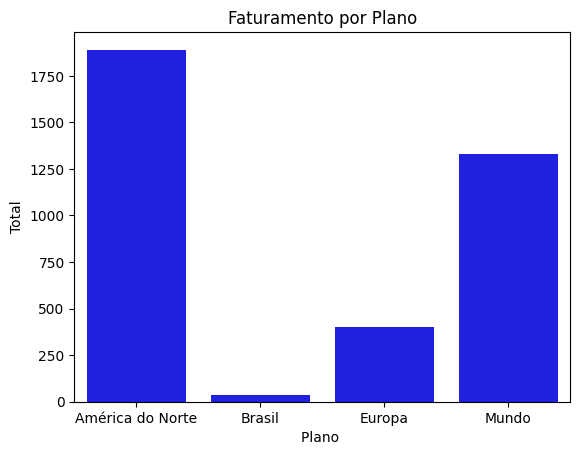

In [13]:
ax= sns.barplot(data=agg_total, x="Plano", y="Total", color = "blue", order=agg_total["Plano"]) # gráfico de barras
ax.set (xlabel = "Plano ", ylabel = "Total", title = "Faturamento por Plano")

# Os planos que mais sairam no período

In [18]:
# agrupamento da quantidade por motivo de viagem


qtd_motivo = base_viagem['Motivo_da_Viagem'].value_counts()
qtd_motivo


,count
Motivo_da_Viagem,
Negócios,66
Estudos,60
Lazer,59
Visita a familiares,30


In [20]:
import matplotlib.pyplot as plt

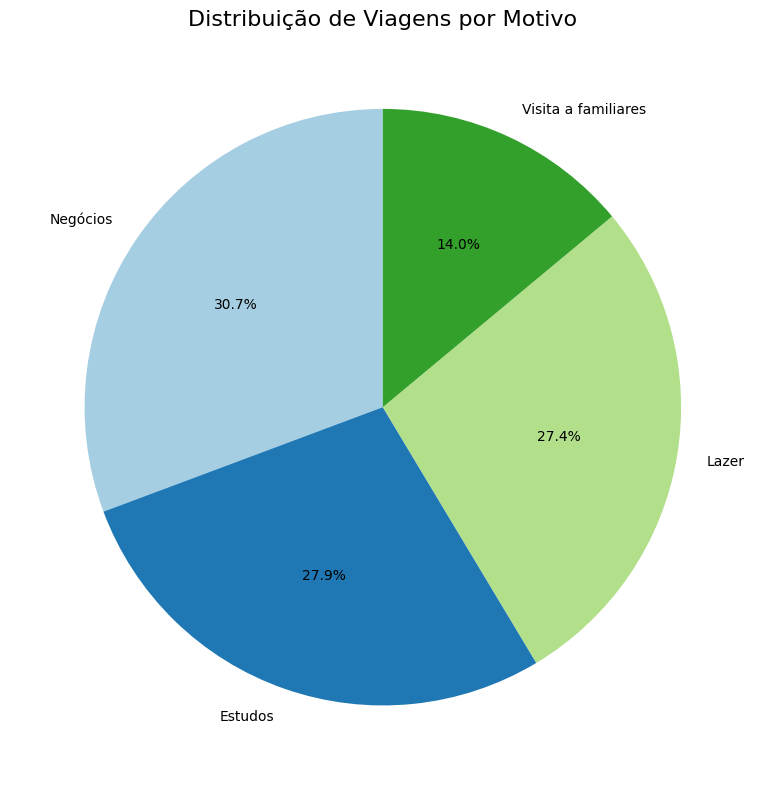

In [21]:
# Criar um gráfico de pizza
qtd_motivo.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribuição de Viagens por Motivo", fontsize=16)
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()

In [22]:
# média de dias
media_dias = base_viagem['Qtd_dias'].mean()
media_dias

7.716279069767442

In [23]:
# media de acompanhantes
media_pessoas = base_viagem['Qtd_Pessoas'].mean()
media_pessoas

2.841860465116279

In [26]:
# países mais visitados

paises_visitados = base_viagem['Destino'].value_counts()
paises_visitados

,count
Destino,
França,66
Japão,60
Brasil,59
EUA,30


[Text(0.5, 0, 'Destino'),
 Text(0, 0.5, 'Quantidade de Viagens'),
 Text(0.5, 1.0, 'Países mais visitados')]

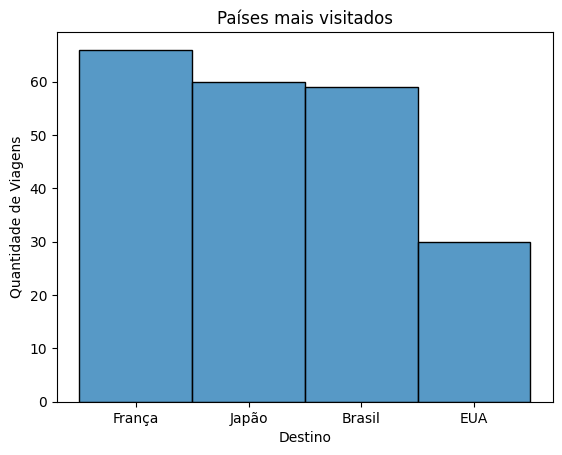

In [32]:
# gráfico

ax= sns.histplot(data=base_viagem, x="Destino")
ax.set (xlabel = "Destino", ylabel = "Quantidade de Viagens", title = "Países mais visitados")


In [34]:
# deficiência( aplicação de desconto)

condicao_especial = base_viagem['Deficiência'].value_counts()
condicao_especial

,count
Deficiência,
Sim,119
Não,96


[Text(0.5, 0, 'Aplicação do desconto'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Quantidade de desconto pela condição de deficiência')]

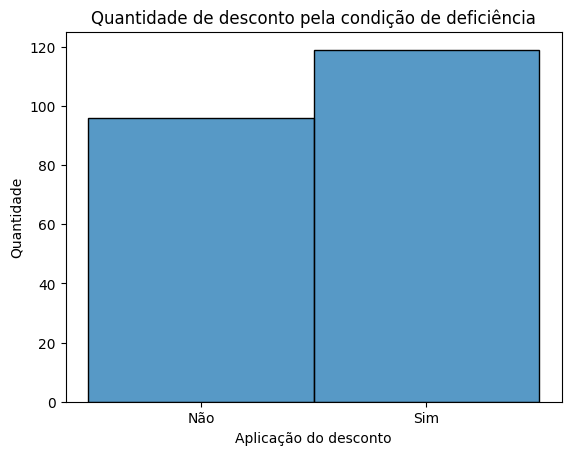

In [35]:
# gráfico

ax= sns.histplot(data=base_viagem, x="Deficiência")
ax.set (xlabel = "Aplicação do desconto", ylabel = "Quantidade", title = "Quantidade de desconto pela condição de deficiência")